The Zillow challenge is about predicting the prices of real estate in 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
prop_data = pd.read_csv("properties_2016.csv")
all_columns = prop_data.columns.values
print prop_data.shape
prop_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [3]:
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print train_data.shape
train_data.head()

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


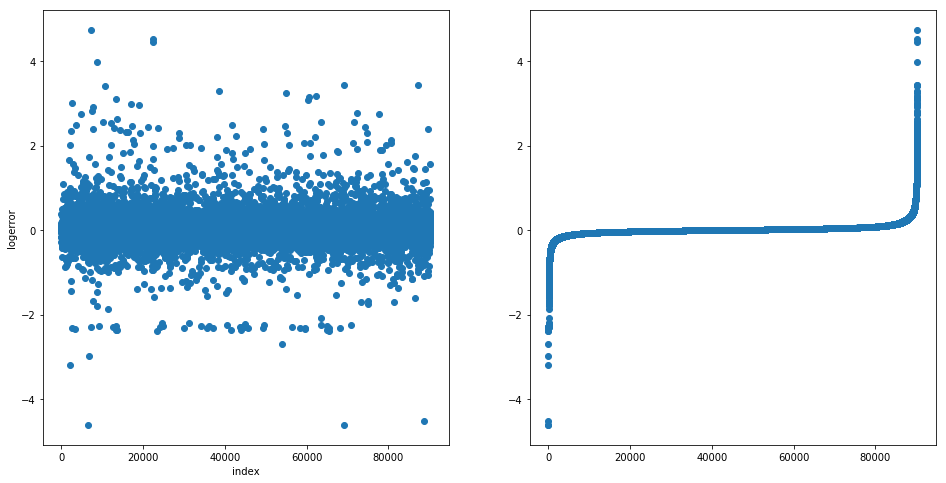

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


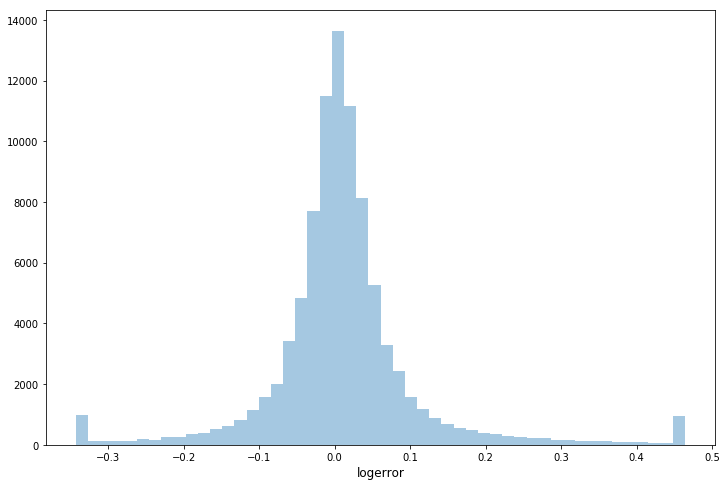

In [4]:
logerror = train_data["logerror"]
hist, bins = np.histogram(logerror, bins=50)
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1]-bins[0])
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.xlabel("index")
plt.ylabel("logerror")
plt.scatter(range(train_data.shape[0]), logerror)
plt.subplot(122)
plt.scatter(range(train_data.shape[0]), np.sort(logerror))
plt.show()
# plt.subplot(133)
ulimit = np.percentile(train_data.logerror.values, 99)
llimit = np.percentile(train_data.logerror.values, 1)
train_data['logerror'].loc[train_data['logerror']>ulimit] = ulimit
train_data['logerror'].loc[train_data['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sb.distplot(train_data.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()


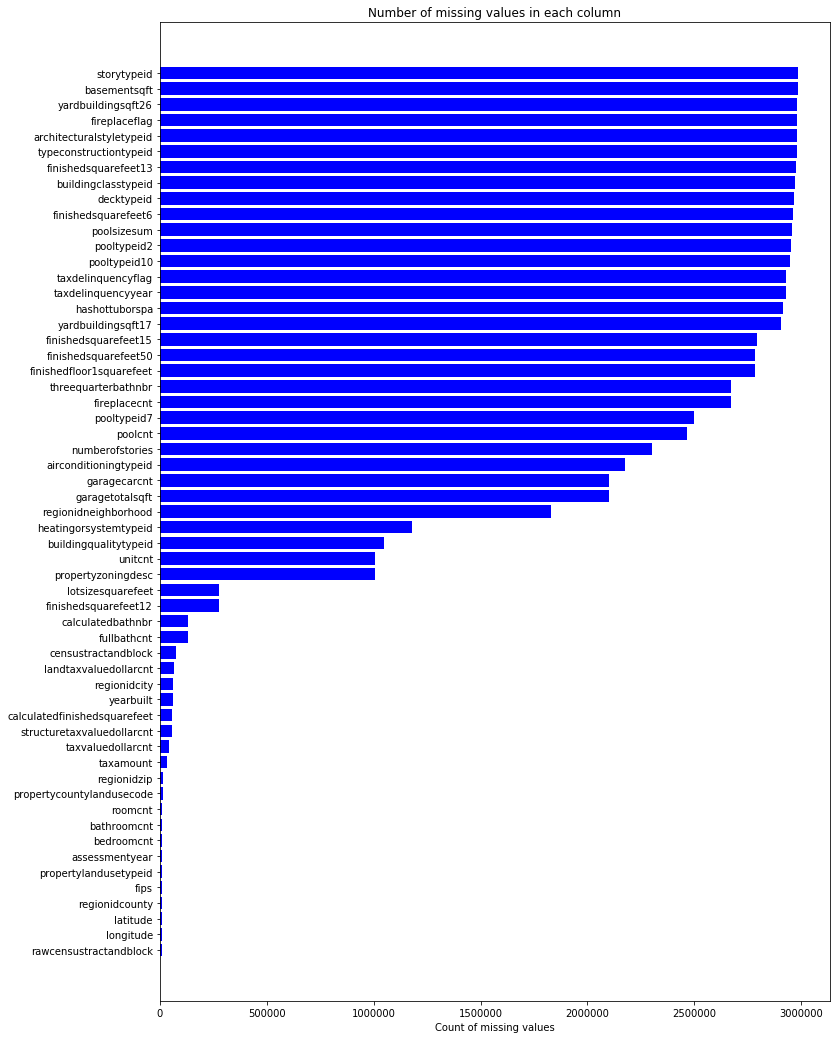

In [5]:
missing_val = prop_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.loc[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')

ind = np.arange(missing_val.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_val.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_val.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [6]:
missing_val['missing_ratio'] = missing_val["missing_count"]/prop_data.shape[0]
missing_val = missing_val.loc[missing_val["missing_ratio"]>0.995]
missing_val


,column_name,missing_count,missing_ratio
6,buildingclasstypeid,2972588,0.995769
13,finishedsquarefeet13,2977545,0.997430
43,typeconstructiontypeid,2978470,0.997740
2,architecturalstyletypeid,2979156,0.997970
49,fireplaceflag,2980054,0.998270
46,yardbuildingsqft26,2982570,0.999113
3,basementsqft,2983589,0.999455
41,storytypeid,2983593,0.999456


In [7]:
prop_data.drop(missing_val.column_name.values, axis=1, inplace=True)

In [8]:
missing_val_rows = prop_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/prop_data.shape[1]
missing_val_rows["missing_ratio"]

0          0.66
1          0.64
2          0.54
3          0.48
4          0.50
5          0.48
6          0.60
7          0.52
8          0.64
9          0.50
10         0.50
11         0.66
12         0.64
13         0.64
14         0.64
15         0.64
16         0.62
17         0.52
18         0.52
19         0.42
20         0.48
21         0.50
22         0.46
23         0.46
24         0.48
25         0.62
26         0.46
27         0.48
28         0.40
29         0.42
           ... 
2985187    0.98
2985188    0.98
2985189    0.98
2985190    0.98
2985191    0.98
2985192    0.98
2985193    0.98
2985194    0.98
2985195    0.98
2985196    0.98
2985197    0.98
2985198    0.98
2985199    0.98
2985200    0.98
2985201    0.98
2985202    0.98
2985203    0.98
2985204    0.98
2985205    0.98
2985206    0.98
2985207    0.98
2985208    0.98
2985209    0.98
2985210    0.98
2985211    0.98
2985212    0.98
2985213    0.98
2985214    0.98
2985215    0.98
2985216    0.98
Name: missing_ratio, Len

In [9]:
# rows_to_delete = missing_val_rows.loc[missing_val_rows["missing_ratio"]>0.95]
# rows_to_delete


In [10]:
# prop_data.drop(prop_data.index[rows_to_delete["row_index"]], inplace=True)
prop_data.shape

(2985217, 50)

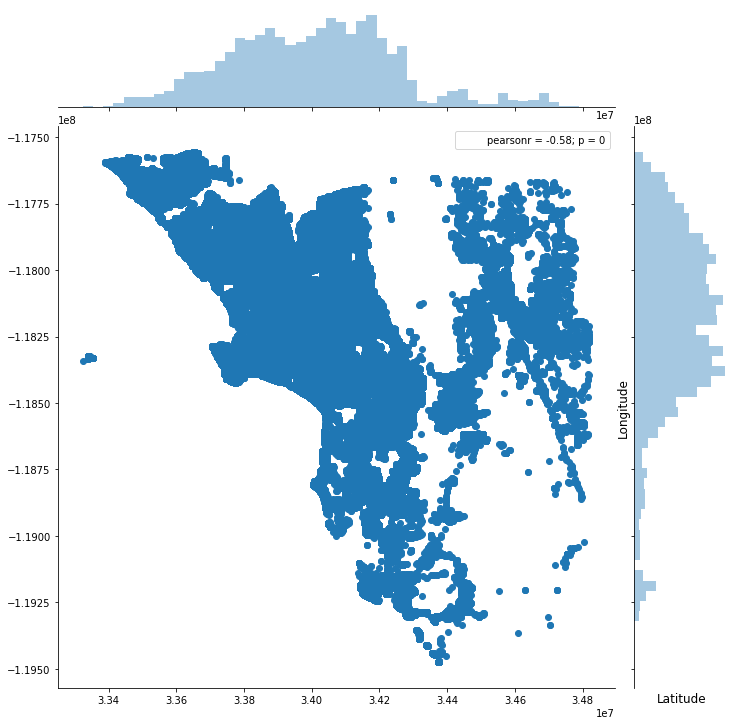

In [11]:
plt.figure(figsize=(12,12))
sb.jointplot(x=prop_data.latitude.values, y=prop_data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [12]:
train_data = pd.merge(train_data, prop_data, on='parcelid', how='left')
train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,NaN,NaN,...,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,NaN,NaN,...,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,NaN,NaN,...,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,NaN,NaN,...,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,NaN,NaN,...,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [13]:
train_data.to_csv("./train_data_merge.csv")

In [14]:
train_data = pd.read_csv("./train_data_merge.csv", index_col=0)
missing_val = train_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.loc[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')
missing_val['missing_ratio'] = missing_val["missing_count"]/train_data.shape[0]
missing_val = missing_val.loc[missing_val["missing_ratio"]>0.80]
missing_val

,column_name,missing_count,missing_ratio
25,poolcnt,72374,0.801706
29,pooltypeid7,73578,0.815043
39,threequarterbathnbr,78266,0.866973
16,fireplacecnt,80668,0.893581
13,finishedsquarefeet50,83419,0.924054
9,finishedfloor1squarefeet,83419,0.924054
12,finishedsquarefeet15,86711,0.960521
41,yardbuildingsqft17,87629,0.970690
20,hashottuborspa,87910,0.973802
50,taxdelinquencyyear,88492,0.980249


In [15]:
train_data.drop(missing_val.column_name.values, axis=1, inplace=True)

In [16]:
train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,0.0,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,...,0.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,0.0,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,0.0,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,...,8.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [17]:
missing_val_rows = train_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/train_data.shape[1]
missing_val_rows["missing_ratio"]

0        0.083333
1        0.222222
2        0.083333
3        0.083333
4        0.166667
5        0.111111
6        0.138889
7        0.194444
8        0.222222
9        0.194444
10       0.111111
11       0.083333
12       0.138889
13       0.250000
14       0.166667
15       0.111111
16       0.166667
17       0.111111
18       0.166667
19       0.083333
20       0.111111
21       0.138889
22       0.166667
23       0.111111
24       0.194444
25       0.111111
26       0.111111
27       0.166667
28       0.083333
29       0.111111
           ...   
90245    0.111111
90246    0.111111
90247    0.111111
90248    0.111111
90249    0.138889
90250    0.166667
90251    0.138889
90252    0.111111
90253    0.111111
90254    0.111111
90255    0.111111
90256    0.138889
90257    0.111111
90258    0.083333
90259    0.083333
90260    0.138889
90261    0.111111
90262    0.083333
90263    0.083333
90264    0.111111
90265    0.111111
90266    0.194444
90267    0.166667
90268    0.111111
90269    0

In [18]:
train_data_new = train_data
train_data_new.fillna(-1).to_csv("./train_data_mod.csv")
# train_data_clean_1 = train_data
train_data.head()
del train_data_new

In [19]:
dtype_df = train_data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
# dtype_df.groupby("Column Type").aggregate("count").reset_index()


,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,airconditioningtypeid,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingqualitytypeid,float64
7,calculatedbathnbr,float64
8,calculatedfinishedsquarefeet,float64
9,finishedsquarefeet12,float64


In [20]:
categorical_columns = pd.Series(['HeatingOrSystemTypeID',
'PropertyLandUseTypeID',
'StoreTypeID',
'AirConditioningTypeID',
'ArchitecturalStyleTypeID',
'TypeConstructionTypeID',
'BuildingClassTypeID'])

In [21]:
train_data.columns.values

array(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'], dtype=object)

In [22]:
for column in train_data:
    print column, "\n",train_data[column].value_counts(dropna=False), "\n\n\n********"

parcelid 
11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64 


********
logerror 
 0.003000    938
 0.002000    915
 0.005000    911
-0.342500    907
 0

In [23]:
columns = [
'logerror',
'transactiondate',
'airconditioningtypeid',
'architecturalstyletypeid',
'basementsqft',
'bathroomcnt',
'bedroomcnt',
'buildingqualitytypeid',
'buildingclasstypeid',
'calculatedbathnbr',
'decktypeid', 'threequarterbathnbr',
'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
'finishedsquarefeet6', 'finishedsquarefeet12',
'finishedsquarefeet13', 'finishedsquarefeet15',
'finishedsquarefeet50', 'fips',
'fireplacecnt', 'fireplaceflag',
'fullbathcnt', 'garagecarcnt',
'garagetotalsqft', 'hashottuborspa',
'heatingorsystemtypeid', 'latitude',
'longitude', 'lotsizesquarefeet',
'numberofstories', 'parcelid',
'poolcnt', 'poolsizesum',
'pooltypeid10', 'pooltypeid2',
'pooltypeid7', 'propertycountylandusecode',
'propertylandusetypeid', 'propertyzoningdesc',
'rawcensustractandblock', 'censustractandblock',
'regionidcounty', 'regionidcity',
'regionidzip', 'regionidneighborhood',
'roomcnt', 'storytypeid',
'typeconstructiontypeid', 'unitcnt',
'yardbuildingsqft17', 'yardbuildingsqft26',
'yearbuilt','taxvaluedollarcnt',
'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
'taxamount', 'assessmentyear', 
'taxdelinquencyflag', 'taxdelinquencyyear'
]

for c in columns:
    if c not in train_data.columns.values:
        print c

architecturalstyletypeid
basementsqft
buildingclasstypeid
decktypeid
threequarterbathnbr
finishedfloor1squarefeet
finishedsquarefeet6
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
fireplacecnt
fireplaceflag
hashottuborspa
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
storytypeid
typeconstructiontypeid
yardbuildingsqft17
yardbuildingsqft26
taxdelinquencyflag
taxdelinquencyyear


/home/jay/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jay/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


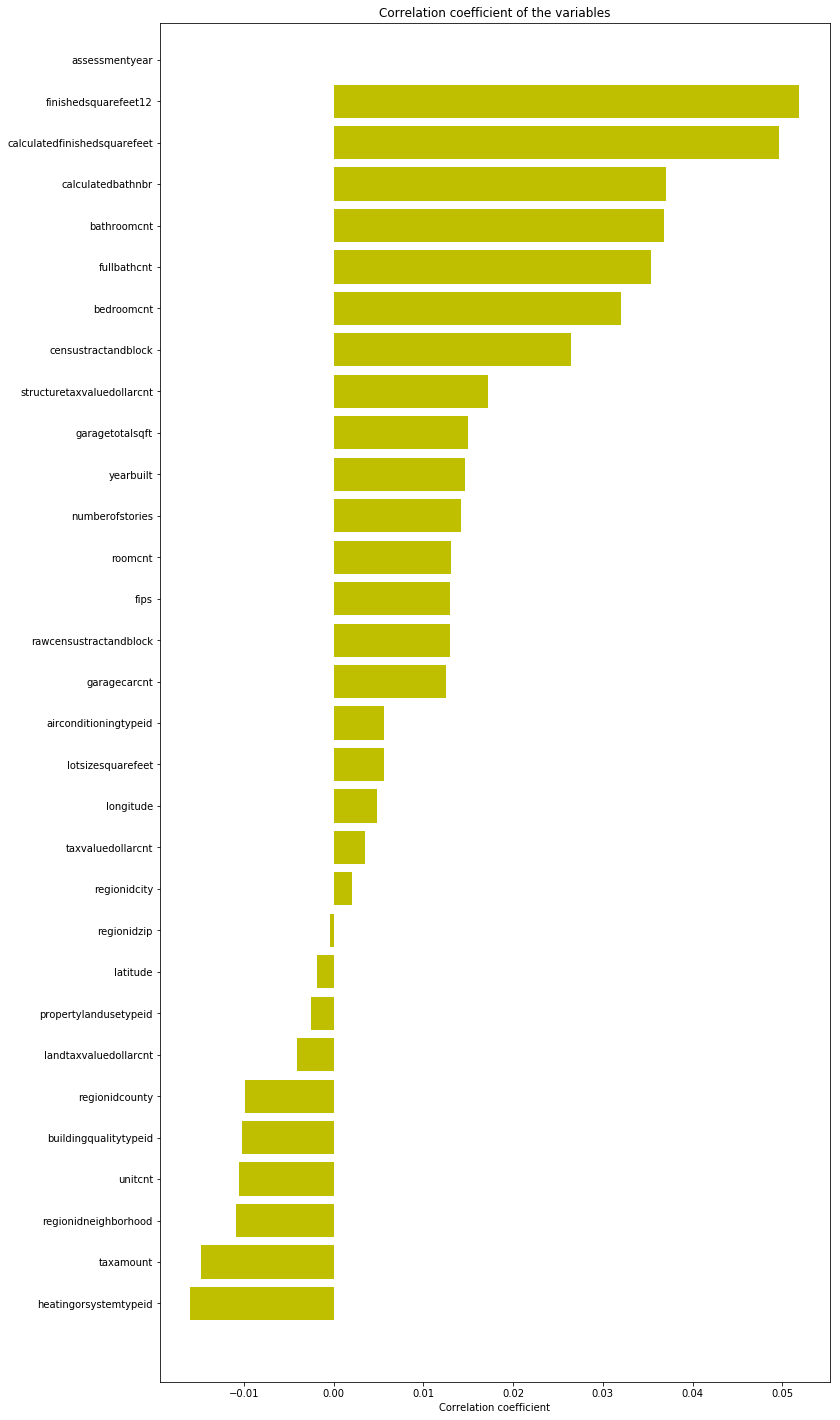

In [24]:
mean_values = train_data.mean(axis=0)
train_data_new = train_data.fillna(0)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_data_new.columns if col not in ['logerror'] if train_data_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_data_new[col].values, train_data_new.logerror.values)[0,1])
corr_data = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_data = corr_data.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,25))
rects = ax.barh(ind, np.array(corr_data.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_data.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [25]:
corr_data_sel = corr_data.loc[(corr_data['corr_values']>0.02) | (corr_data['corr_values'] < -0.01)]
corr_data_sel

,col_labels,corr_values
11,heatingorsystemtypeid,-0.015970
29,taxamount,-0.014767
19,regionidneighborhood,-0.010836
22,unitcnt,-0.010542
3,buildingqualitytypeid,-0.010246
30,censustractandblock,0.026423
2,bedroomcnt,0.032035
8,fullbathcnt,0.035350
1,bathroomcnt,0.036862
4,calculatedbathnbr,0.037040


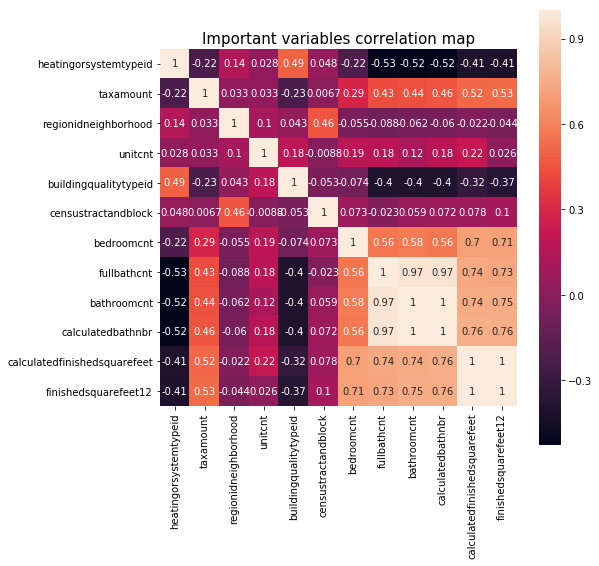

In [26]:
cols_to_use = corr_data_sel.col_labels.tolist()

temp_df = train_data[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., annot=True, square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [27]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

non_float_cols = ["propertycountylandusecode"]
cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]

train_df = train_data_new.drop(["parcelid", "logerror", "transactiondate", "propertyzoningdesc"]+non_float_cols+cat_cols, axis=1)
target = train_data_new["logerror"].values

feature_names = train_df.columns.values

print feature_names

X_train, X_test, y_train, y_test = train_test_split( train_df, target, test_size=0.3)

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# print y_pred.shape

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: % f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))

# # # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Variance score: % f' % regr.score( X_test, y_test))

['bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid' 'calculatedbathnbr'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips' 'fullbathcnt'
 'garagecarcnt' 'garagetotalsqft' 'latitude' 'longitude'
 'lotsizesquarefeet' 'rawcensustractandblock' 'regionidcity'
 'regionidcounty' 'regionidneighborhood' 'regionidzip' 'roomcnt' 'unitcnt'
 'yearbuilt' 'numberofstories' 'structuretaxvaluedollarcnt'
 'taxvaluedollarcnt' 'assessmentyear' 'landtaxvaluedollarcnt' 'taxamount'
 'censustractandblock']
('Coefficients: \n', array([ -2.24514938e-02,  -2.23126748e-04,   5.29377438e-04,
         2.38999656e-02,   1.17740897e-05,   3.43246851e-07,
         3.57702464e-03,  -9.65771501e-04,  -3.62519795e-03,
        -7.47357045e-06,   2.17045922e-09,   6.73850532e-09,
         7.36733637e-09,  -3.45936636e-07,   7.41108601e-09,
         2.60571514e-06,   4.26556388e-10,   3.84870474e-08,
        -8.26832727e-04,  -1.01139076e-02,  -1.09630686e-05,
         3.03183962e-03,   2.71623378e+05,  -2.716233

In [28]:
train_data.to_csv("./train_data_clean.csv")
train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,0.0,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,...,0.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,0.0,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,0.0,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,...,8.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


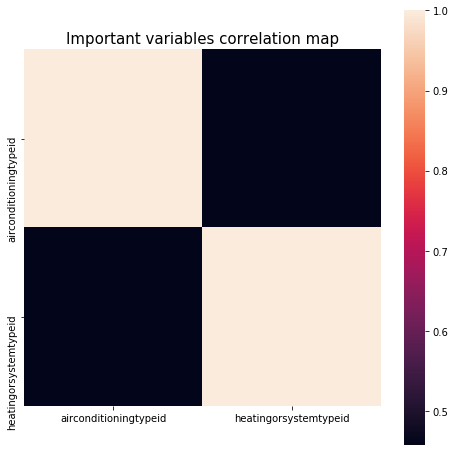

In [29]:
# train_data_new = train_data.fillna(-1)
train_data = pd.read_csv("./train_data_clean.csv", index_col=0)

# Now let us look at the correlation coefficient of each of these variables #
cols_to_use = [col for col in train_data_new.columns if col in ['airconditioningtypeid', 'heatingorsystemtypeid']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [30]:
train_data[["airconditioningtypeid", "heatingorsystemtypeid"]]

,airconditioningtypeid,heatingorsystemtypeid
0,1.0,2.0
1,NaN,NaN
2,1.0,2.0
3,1.0,2.0
4,NaN,NaN
5,1.0,2.0
6,NaN,7.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [31]:
#imputing airconditioningtypeid, making some NaN to 1.0 where heatingorsystemtypeid == 2

temp_ind = train_data.index[train_data["heatingorsystemtypeid"] == 2]
for i, row in train_data.iterrows():
    if i in temp_ind and np.isnan(row["airconditioningtypeid"]):
        train_data.loc[i, "airconditioningtypeid"] = 1.0

train_data["airconditioningtypeid"].fillna(-1, inplace=True)
train_data["airconditioningtypeid"].value_counts()

train_data[["airconditioningtypeid", "heatingorsystemtypeid"]]

,airconditioningtypeid,heatingorsystemtypeid
0,1.0,2.0
1,-1.0,NaN
2,1.0,2.0
3,1.0,2.0
4,-1.0,NaN
5,1.0,2.0
6,-1.0,7.0
7,-1.0,NaN
8,-1.0,NaN
9,-1.0,NaN


In [32]:
duplicate_or_not_useful_cols = pd.Series(['calculatedbathnbr', 'assessmentyear', 'fullbathcnt', 
                    'regionidneighborhood', 'propertyzoningdesc', 'censustractandblock'])#,'finishedsquarefeet12'])
train_data.drop(duplicate_or_not_useful_cols, axis=1, inplace=True)

## Imputing values

In [33]:
train_data["buildingqualitytypeid"].fillna(train_data["buildingqualitytypeid"].mean(), inplace=True)
train_data["calculatedfinishedsquarefeet"].interpolate(inplace=True)
train_data["heatingorsystemtypeid"].fillna(-1, inplace=True)
train_data["lotsizesquarefeet"].fillna(train_data["lotsizesquarefeet"].median(), inplace=True)
train_data.drop(["numberofstories"], axis=1, inplace=True)
#removing propertycountylandusecode because it is not in interpretable format
train_data.drop(["propertycountylandusecode"], axis=1, inplace=True)
train_data["regionidcity"].interpolate(inplace=True)
train_data["regionidzip"].interpolate(inplace=True)
train_data["yearbuilt"].fillna(train_data["yearbuilt"].mean(), inplace=True)

#impute structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount by interpolation
cols_to_interpolate = ["structuretaxvaluedollarcnt", "taxvaluedollarcnt", "landtaxvaluedollarcnt", "taxamount"]
for c in cols_to_interpolate:
    train_data[c].interpolate(inplace=True)

    
# train_data.fillna(train_data.mean(), inplace=True)

In [34]:
#imputing garagecarcnt on basis of propertylandusetypeid
#All the residential places have 1 or 2 garagecarcnt, hence using random filling for those values.

for i, row in train_data.iterrows():
    if row["propertylandusetypeid"] in [261, 266] and np.isnan(row["garagecarcnt"]):
        train_data.loc[i, "garagecarcnt"] = np.random.randint(1,3)

train_data["garagecarcnt"].fillna(-1, inplace=True)

train_data["garagecarcnt"].value_counts(dropna=False)

 2.0     48959
 1.0     33752
-1.0      6248
 3.0       663
 0.0       290
 4.0       262
 5.0        54
 6.0        16
 7.0        11
 8.0         7
 9.0         6
 11.0        2
 10.0        2
 13.0        1
 24.0        1
 14.0        1
Name: garagecarcnt, dtype: int64

In [35]:
#imputing garagetotalsqft using the garagecarcnt

for i, row in train_data.iterrows():
    if np.isnan(row["garagetotalsqft"]) or row["garagetotalsqft"] == 0:
        if row["garagecarcnt"] == -1:
            train_data.loc[i, "garagetotalsqft"] = -1
        elif row["garagecarcnt"] == 1:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(180, 400)
        elif row["garagecarcnt"] == 2:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(400, 720)
        elif row["garagecarcnt"] == 3:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(720, 880)
        elif row["garagecarcnt"] == 4:
            train_data.loc[i, "garagetotalsqft"] = np.random.randint(880, 1200)

train_data["garagetotalsqft"].interpolate(inplace=True)

train_data["garagetotalsqft"].value_counts(dropna=False)

-1.0       6248
 400.0     1076
 441.0      893
 360.0      877
 462.0      840
 460.0      794
 440.0      782
 420.0      721
 483.0      594
 480.0      438
 430.0      392
 437.0      365
 504.0      361
 451.0      342
 456.0      298
 0.0        290
 380.0      278
 396.0      275
 484.0      254
 390.0      252
 399.0      245
 630.0      226
 472.0      216
 471.0      216
 240.0      215
 438.0      213
 200.0      213
 528.0      212
 506.0      211
 410.0      210
           ... 
 2206.0       1
 1138.0       1
 2003.0       1
 811.0        1
 1018.0       1
 1354.0       1
 769.0        1
 1109.0       1
 175.0        1
 1111.0       1
 1365.0       1
 981.0        1
 869.0        1
 126.0        1
 1110.0       1
 1162.0       1
 1190.0       1
 1264.0       1
 3362.0       1
 1046.0       1
 1132.0       1
 1082.0       1
 1442.0       1
 796.0        1
 1028.0       1
 1239.0       1
 1093.0       1
 1054.0       1
 919.0        1
 1038.0       1
Name: garagetotalsqft, L

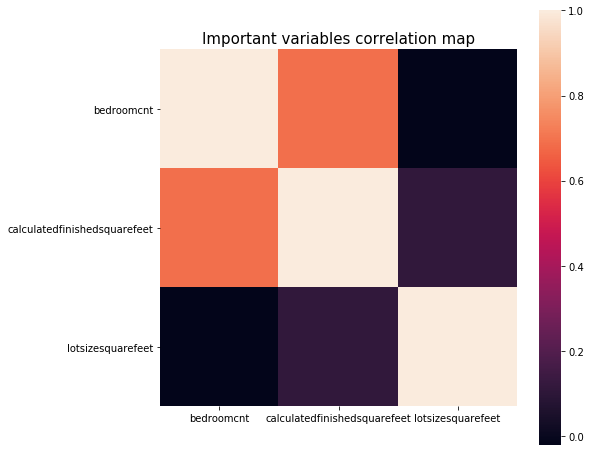

In [36]:
cols_to_use = [col for col in train_data_new.columns if col in ['calculatedfinishedsquarefeet', 'bedroomcnt', 'lotsizesquarefeet']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [37]:
for column in train_data:
    print column, "\n",train_data[column].value_counts(dropna=False), "\n\n\n********"

parcelid 
11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64 


********
logerror 
 0.003000    938
 0.002000    915
 0.005000    911
-0.342500    907
 0

In [38]:
#imputing unitcnt using propertylandusetypeid

for i, row in train_data.iterrows():
    if np.isnan(row["unitcnt"]):
        if row["propertylandusetypeid"] in [261, 266, 269]:
            train_data.loc[i, "unitcnt"] = 1
        elif row["propertylandusetypeid"] == 246:
            train_data.loc[i, "unitcnt"] = 2
        elif row["propertylandusetypeid"] == 247:
            train_data.loc[i, "unitcnt"] = 3
        elif row["propertylandusetypeid"] == 248:
            train_data.loc[i, "unitcnt"] = 4
            
train_data["unitcnt"].fillna(1, inplace=True)

train_data["unitcnt"].value_counts(dropna=False)

1.0      86395
2.0       2368
4.0        884
3.0        622
6.0          1
5.0          1
9.0          1
11.0         1
143.0        1
70.0         1
Name: unitcnt, dtype: int64

In [39]:
train_data.isnull().sum()

parcelid                           0
logerror                           0
transactiondate                    0
airconditioningtypeid              0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
finishedsquarefeet12            4679
fips                               0
garagecarcnt                       0
garagetotalsqft                    0
heatingorsystemtypeid              0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                       0
regionidcounty                     0
regionidzip                        0
roomcnt                            0
unitcnt                            0
yearbuilt                          0
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
t

In [40]:
train_data.fillna(-1, inplace=True)
train_data.to_csv("./train_data_clean_2.csv")

## Creating New features

In [41]:
train_data = pd.read_csv("train_data_clean_2.csv", index_col=0)

train_data['age'] = 2018 - train_data['yearbuilt']

#proportion of living area
train_data['N-LivingAreaProp'] = train_data['calculatedfinishedsquarefeet']/train_data['lotsizesquarefeet']

#Ratio of the built structure value to land area
train_data['N-ValueProp'] = train_data['structuretaxvaluedollarcnt']/train_data['landtaxvaluedollarcnt']

#Ratio of tax of property over parcel
train_data['N-ValueRatio'] = train_data['taxvaluedollarcnt']/train_data['taxamount']


#Average structuretaxvaluedollarcnt by city
group = train_data.groupby('regionidcity')['structuretaxvaluedollarcnt'].aggregate('mean').to_dict()
train_data['N-Avg-structuretaxvaluedollarcnt'] = train_data['regionidcity'].map(group)

#Deviation away from average
train_data['N-Dev-structuretaxvaluedollarcnt'] = abs((train_data['structuretaxvaluedollarcnt'] - 
                        train_data['N-Avg-structuretaxvaluedollarcnt']))/train_data['N-Avg-structuretaxvaluedollarcnt']

#Number of properties in the zip
zip_count = train_data['regionidzip'].value_counts().to_dict()
train_data['N-zip_count'] = train_data['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = train_data['regionidcity'].value_counts().to_dict()
train_data['N-city_count'] = train_data['regionidcity'].map(city_count)

#Number of properties in the city
region_count = train_data['regionidcounty'].value_counts().to_dict()
train_data['N-county_count'] = train_data['regionidcounty'].map(region_count)

## Plotting Some interesting bar chart

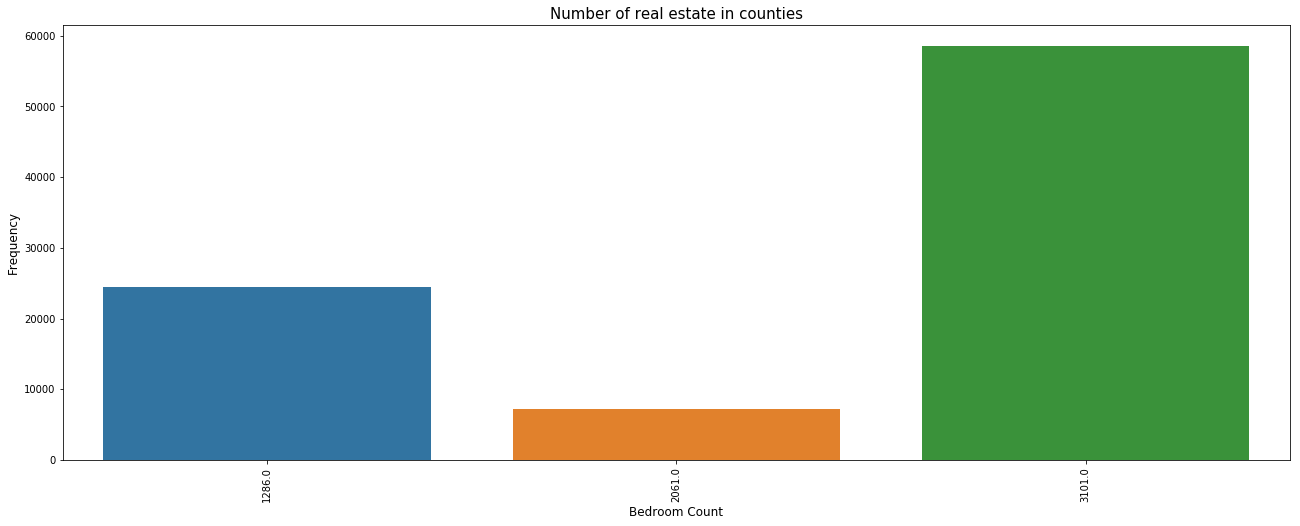

In [42]:
plt.figure(figsize=(22,8))
sb.countplot(x="regionidcounty", data=train_data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of real estate in counties", fontsize=15)
plt.show()


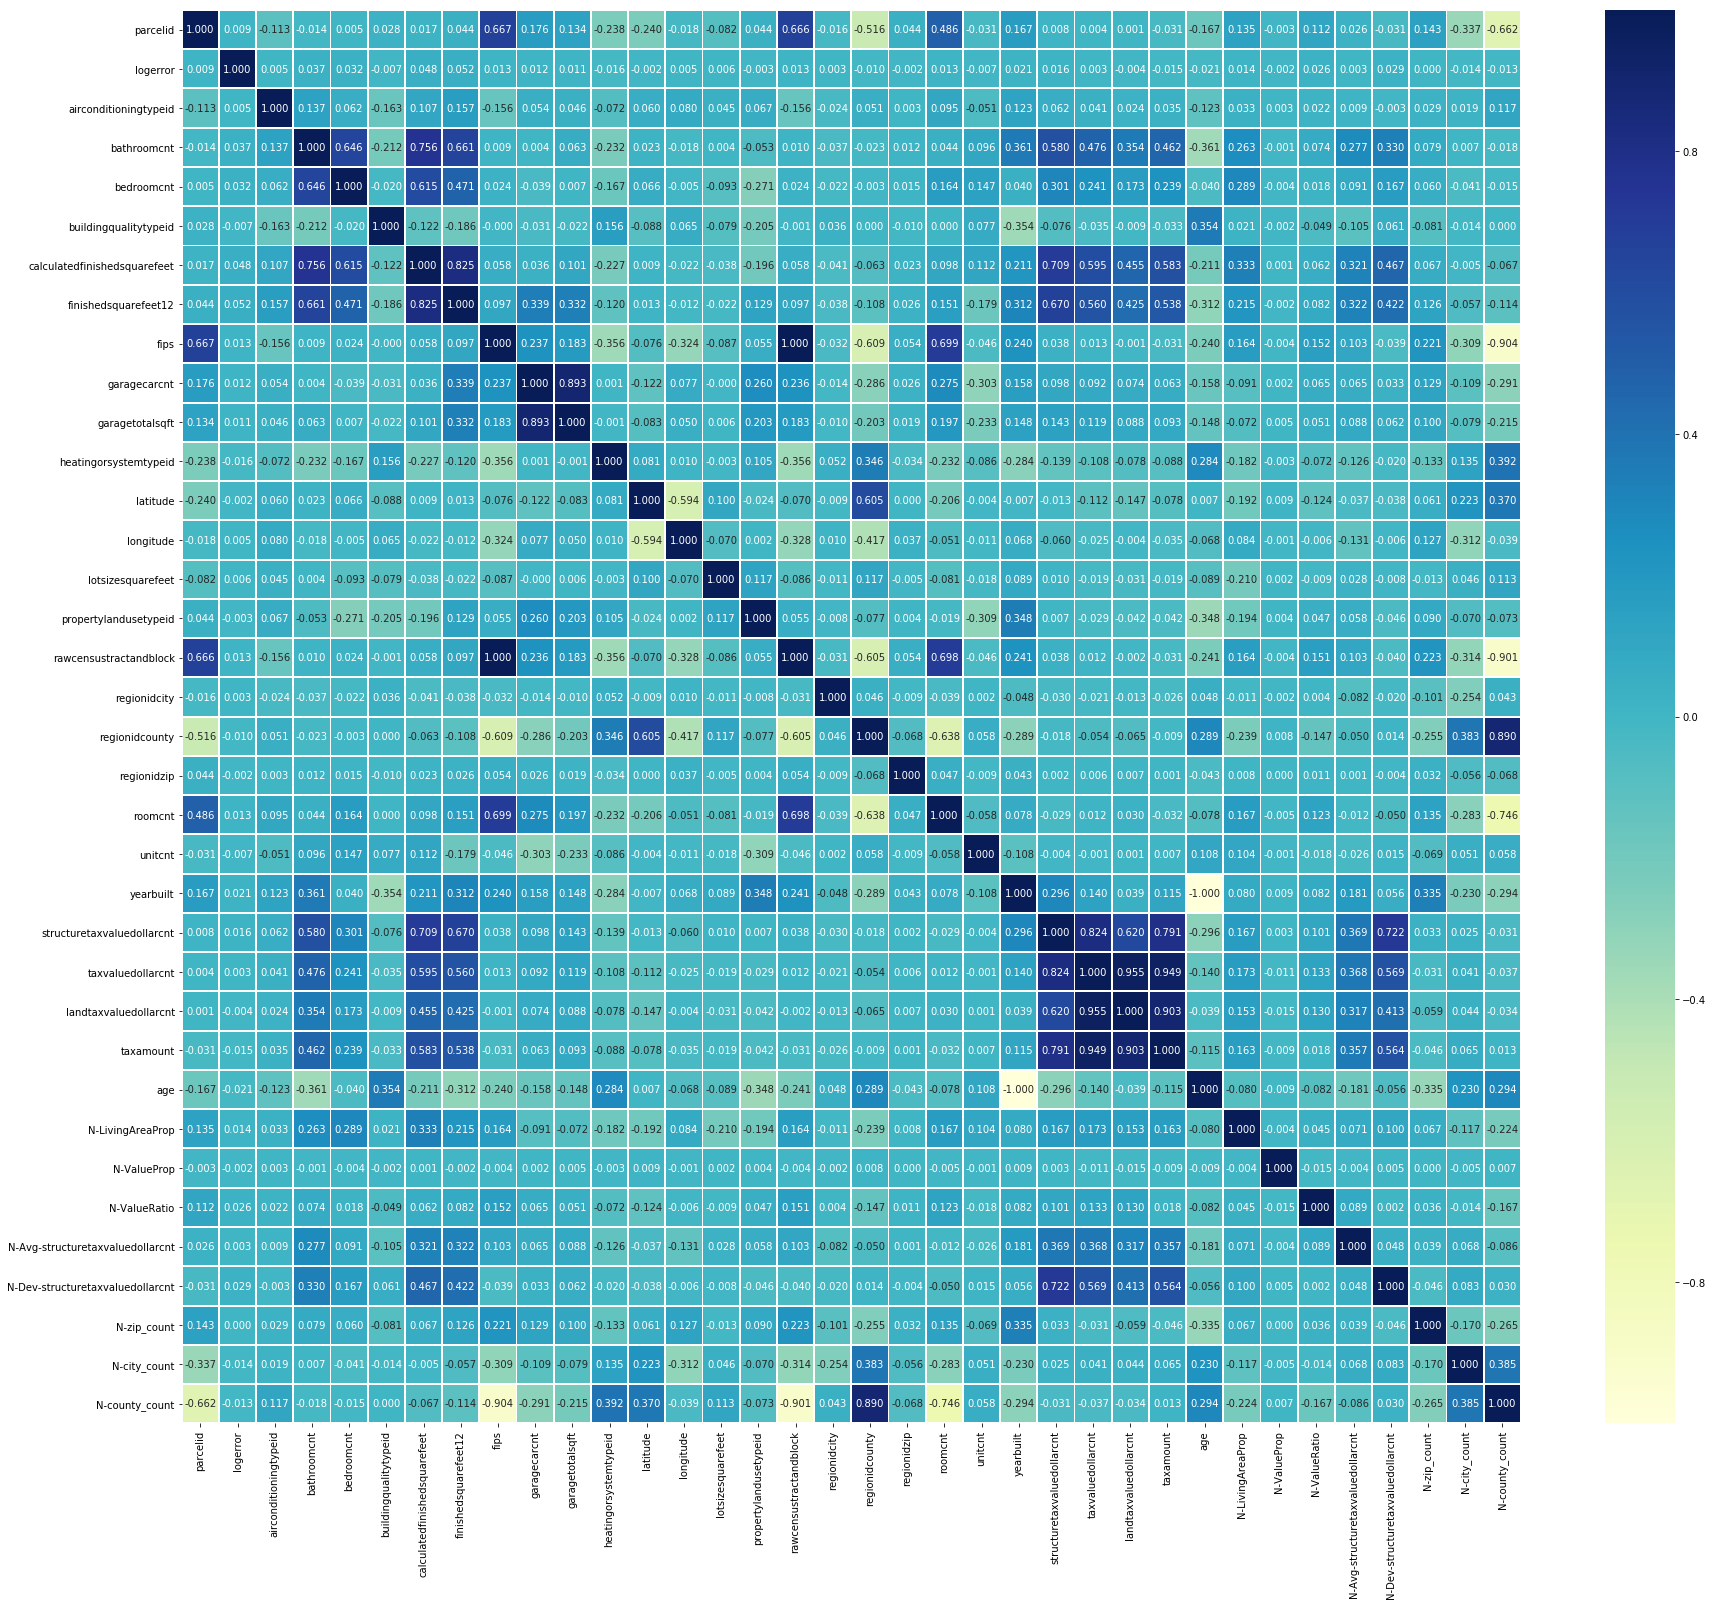

In [43]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", annot=True, fmt=".3f", linewidths=1.0)

In [44]:
corr_fig = corr_fig.get_figure()
corr_fig.savefig("./correlation_plot_1.png")

### Analysing the above Heatmap

Here we can observe that the tax related variables are highly correlated, which means it is redundant to use all of these for further analysis
Since, 'taxamount' is described as 'The total property tax assessed for that assessment year' it seem like a good option to keep and to discard the other tax variables.

There 3 more pairs of variables that are highly correlated and do not contribute to adding more information.
These pairs are :
1. fips / rawcensustractandblock
2. structuretaxvaluedollarcnt/ landtaxvaluedollarcnt/ taxvaluedollarcnt
3. garagecarcnt / garagetotalsqft

After carefully analysing the data
I decided to drop, rawcensustractandblock, structuretaxvaluedollarcnt, landtaxvaluedollarcnt, garagecarcnt

In [45]:
train_data.drop(["rawcensustractandblock", "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "taxvaluedollarcnt", "garagecarcnt"],axis=1, inplace=True)#, "calculatedfinishedsquarefeet"], axis=1, inplace=True)

### Lets plot the correlation again

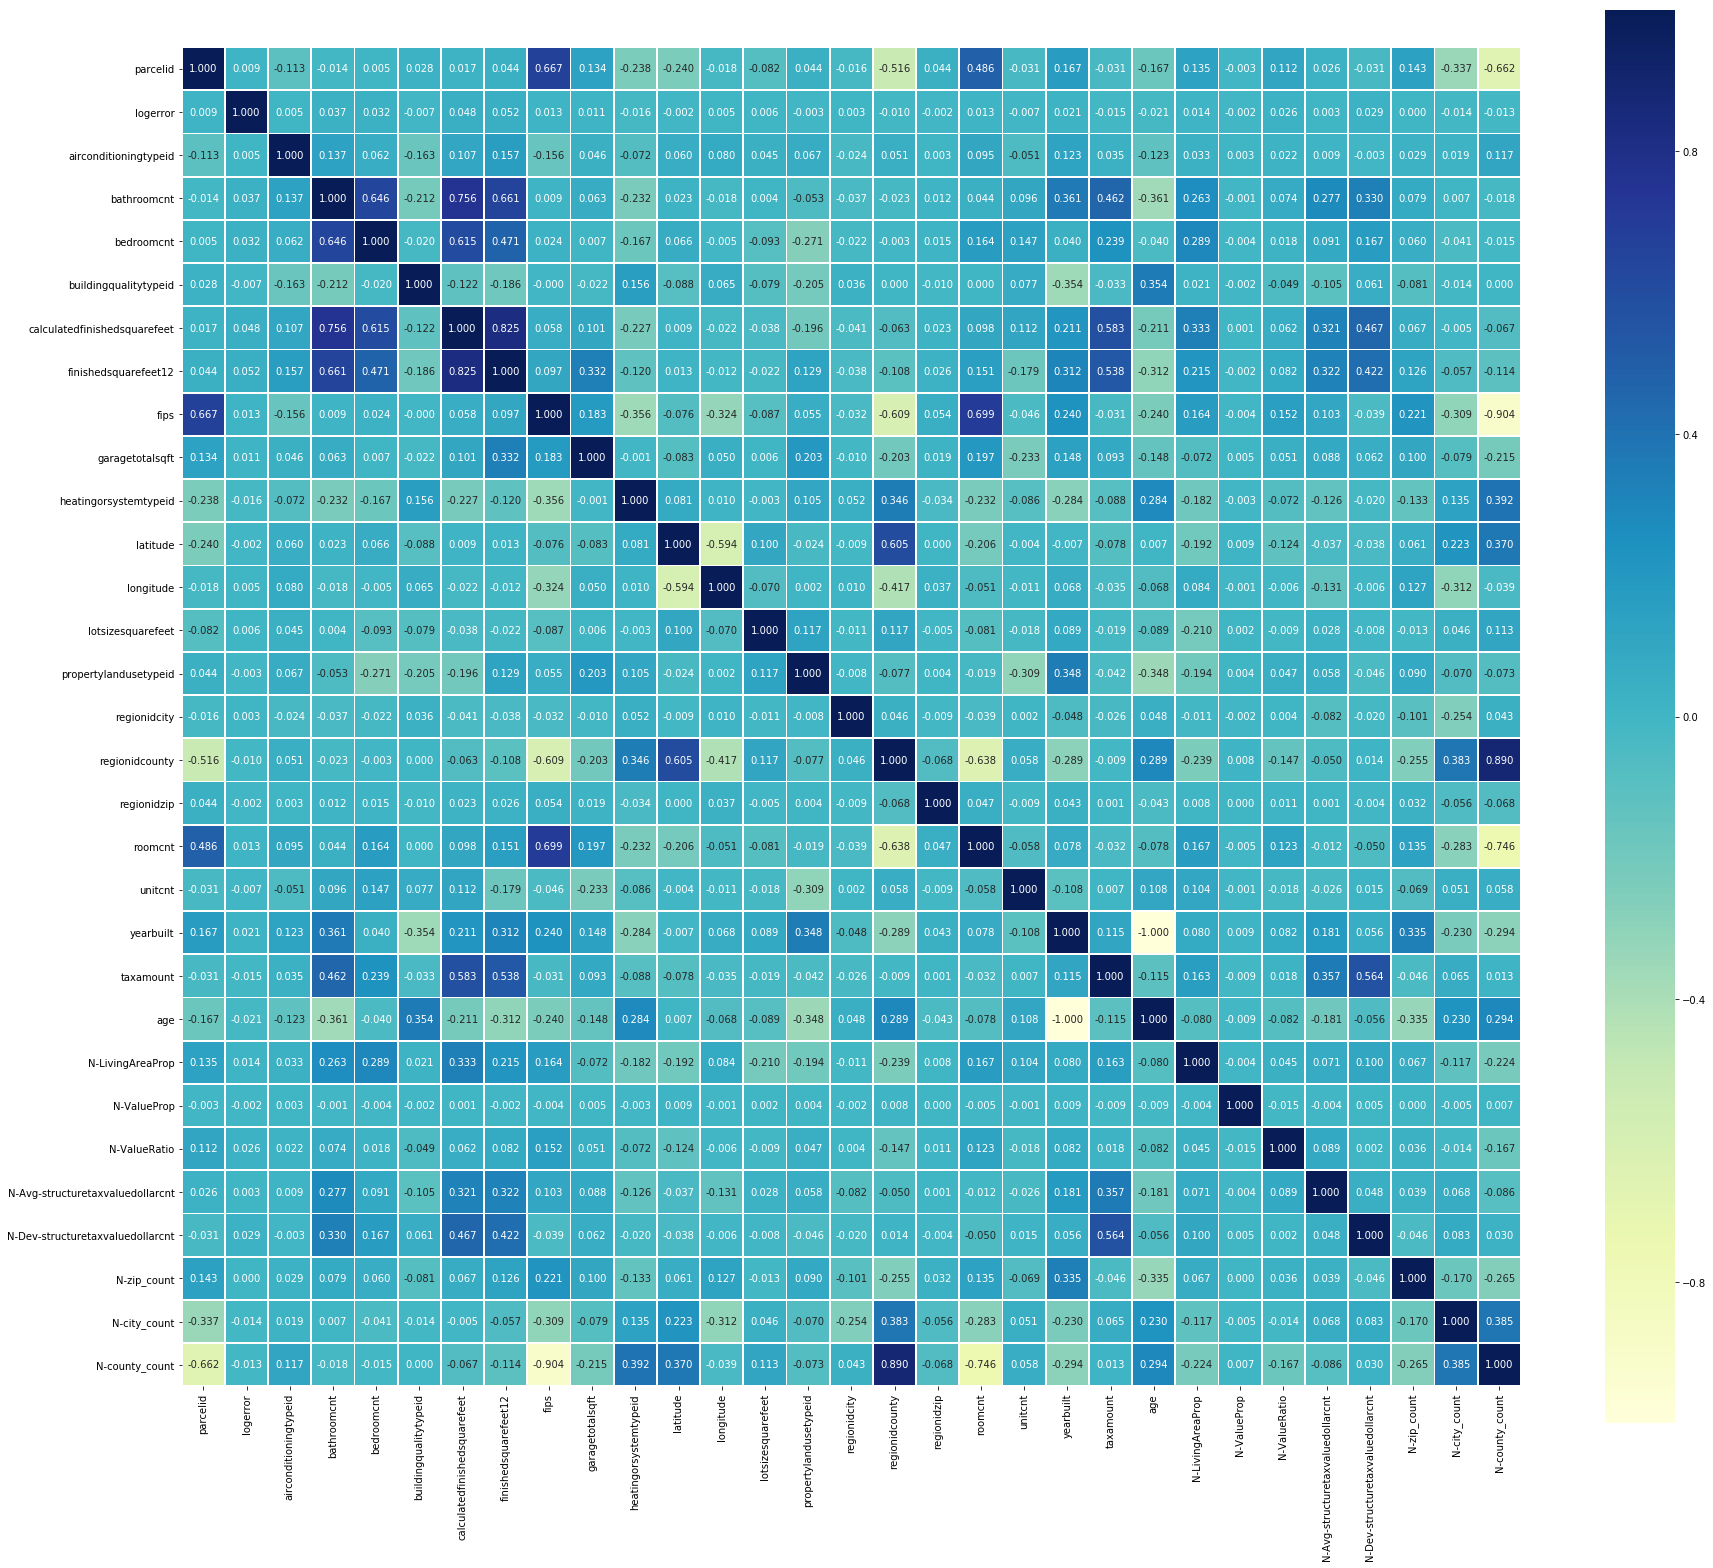

In [46]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", square=True, annot=True, fmt=".3f", linewidths=1.0)
corr_fig = corr_fig.get_figure()
corr_fig.savefig("./correlation_plot_2.png")

Let's do a linear regression on the current data

In [49]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split

train_data.fillna(train_data.mean(), inplace=True)

cat_cols = []
# cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]

train_df = train_data.drop(["parcelid", "logerror", "transactiondate"]+cat_cols, axis=1)
target = train_data["logerror"].values

feature_names = train_df.columns.values

print feature_names

X_train, X_test, y_train, y_test = train_test_split( train_df, target, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# print y_pred.shape

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))


# # # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Variance score: % f' % regr.score( X_test, y_test))


['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips'
 'garagetotalsqft' 'heatingorsystemtypeid' 'latitude' 'longitude'
 'lotsizesquarefeet' 'propertylandusetypeid' 'regionidcity'
 'regionidcounty' 'regionidzip' 'roomcnt' 'unitcnt' 'yearbuilt' 'taxamount'
 'age' 'N-LivingAreaProp' 'N-ValueProp' 'N-ValueRatio'
 'N-Avg-structuretaxvaluedollarcnt' 'N-Dev-structuretaxvaluedollarcnt'
 'N-zip_count' 'N-city_count' 'N-county_count']
('Coefficients: \n', array([ -4.77561217e-05,  -5.66308825e-05,   6.26820617e-05,
         3.66638528e-04,   4.35942834e-06,   4.78849183e-06,
        -1.43400084e+08,  -3.30078595e-06,  -2.75334126e-04,
        -1.29455326e-09,   5.81999455e-09,   6.31602443e-09,
        -8.50610385e-05,   1.01211722e-09,   3.44935632e+06,
        -1.75262729e-07,  -9.47748131e-05,  -5.73684238e-04,
         9.84664338e+07,  -1.26701058e-06,   9.84664338e+07,
        -9.99773455e-05,  -9.19730348e

In [50]:
for cols in train_data:
    print cols , train_data[cols].isnull().sum()
    

parcelid 0
logerror 0
transactiondate 0
airconditioningtypeid 0
bathroomcnt 0
bedroomcnt 0
buildingqualitytypeid 0
calculatedfinishedsquarefeet 0
finishedsquarefeet12 0
fips 0
garagetotalsqft 0
heatingorsystemtypeid 0
latitude 0
longitude 0
lotsizesquarefeet 0
propertylandusetypeid 0
regionidcity 0
regionidcounty 0
regionidzip 0
roomcnt 0
unitcnt 0
yearbuilt 0
taxamount 0
age 0
N-LivingAreaProp 0
N-ValueProp 0
N-ValueRatio 0
N-Avg-structuretaxvaluedollarcnt 0
N-Dev-structuretaxvaluedollarcnt 0
N-zip_count 0
N-city_count 0
N-county_count 0


## Let's see the feature importance

Mean absolute error:  0.060151
Mean squared error: 0.009909


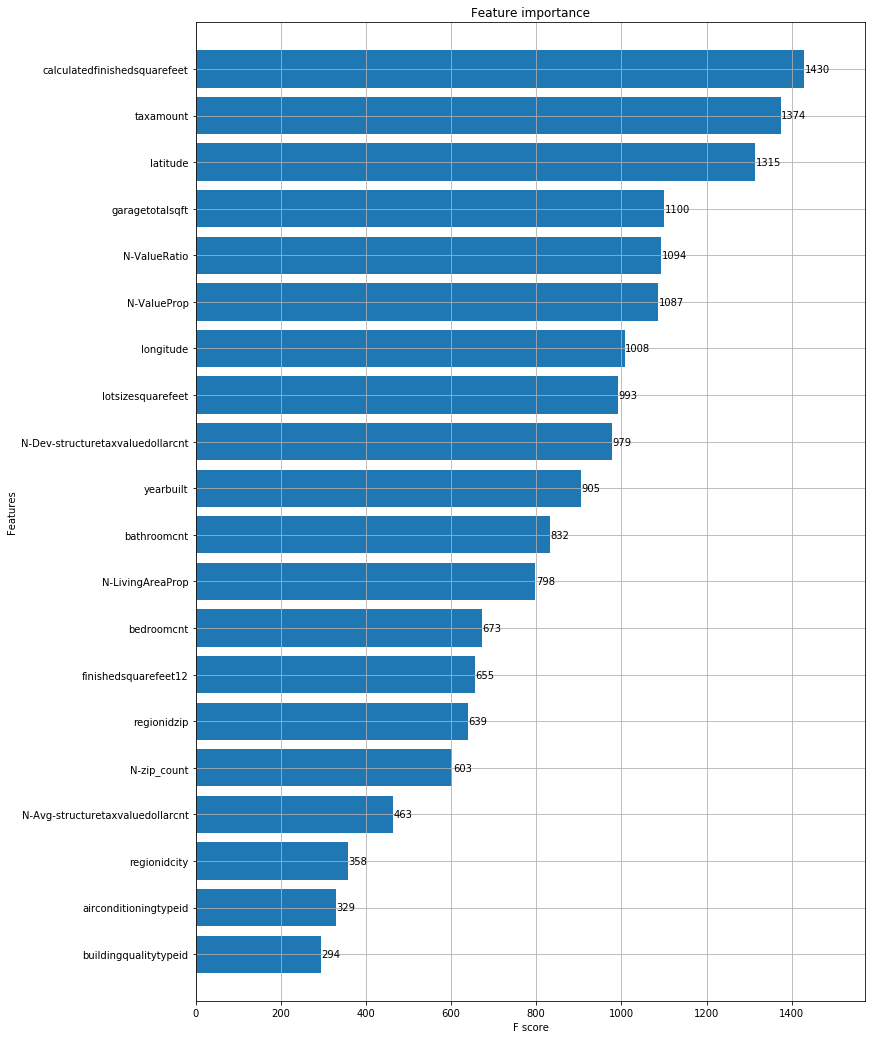

In [89]:
import xgboost as xgb

n_features = 20

train_y = train_data['logerror'].values
df_train = train_data.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
feat_names = df_train.columns.values

for c in df_train.columns:
    if df_train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_train[c].values))
        df_train[c] = lbl.transform(list(df_train[c].values))

#import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df_train, train_y, feature_names=df_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

thresholds = model.get_fscore()
L = [(k,v) for (k,v) in thresholds.iteritems()]
thresholds = sorted(L, key=lambda x: x[1] , reverse=True)[:n_features]
thresholds = dict(thresholds)

df_train = df_train.drop([k for k in feat_names if k not in thresholds], axis=1)
X_train, X_test, y_train, y_test = train_test_split( df_train, train_y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
X_test = xgb.DMatrix(X_test)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)
    
y_pred = model.predict(X_test)


print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))


# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [96]:
not_to_drop = ['parcelid', 'logerror', 'transactiondate']
df_train = train_data.drop([k for k in train_data.columns.values if k not in thresholds.keys() + not_to_drop], axis=1)
print df_train.columns.values
df_train.to_csv("./important_features.csv", index=False)

['parcelid' 'logerror' 'transactiondate' 'airconditioningtypeid'
 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'garagetotalsqft'
 'latitude' 'longitude' 'lotsizesquarefeet' 'regionidcity' 'regionidzip'
 'yearbuilt' 'taxamount' 'N-LivingAreaProp' 'N-ValueProp' 'N-ValueRatio'
 'N-Avg-structuretaxvaluedollarcnt' 'N-Dev-structuretaxvaluedollarcnt'
 'N-zip_count']


## Ridge Regression

In [98]:
df_train = pd.read_csv("./important_features.csv")

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]
ridge_df_train = df_train.drop(["parcelid", "logerror", "transactiondate"], axis=1)
# target = train_data["logerror"].values

# feature_names = train_df.columns.values
# print feature_names

X_train, X_test, y_train, y_test = train_test_split( ridge_df_train, train_y, test_size=0.2, random_state=42)

# scorer = make_scorer(mean_sbsolute_error, greater_is_better=False)

reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], normalize=True, gcv_mode='auto')
reg.fit( X_train, y_train)       

y_pred = reg.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))

print reg.alpha_
print reg.coef_
print reg.intercept_


Mean absolute error:  0.060325
Mean squared error: 0.010102
0.1
[ -1.31526166e-04   2.31579262e-04   4.02949316e-04   3.34744196e-04
   3.87953882e-06   3.66608187e-06  -1.57461216e-06  -2.55383815e-10
   7.73539128e-10   5.30818628e-09   8.73948797e-10  -1.44978630e-07
   3.19218037e-05  -1.00313606e-06   8.53706214e-04  -7.85925677e-06
   8.09759605e-05   1.91559534e-09   3.82103497e-03  -4.73940783e-06]
0.0446881520748


## Lasso Regression

In [99]:
lasso_df_train = df_train.drop(["parcelid", "logerror", "transactiondate"], axis=1)

X_train, X_test, y_train, y_test = train_test_split( lasso_df_train, train_y, test_size=0.2, random_state=42)

# scorer = make_scorer(mean_sbsolute_error, greater_is_better=False)
reg = linear_model.LassoCV(normalize=True, precompute='auto', n_jobs=-1, random_state=7,
                           selection='random')
reg.fit( X_train, y_train)       

y_pred = reg.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))


print reg.alpha_
print reg.coef_
print reg.intercept_


Mean absolute error:  0.060311
Mean squared error: 0.010116
4.88597096481e-06
[ -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.53707674e-06   2.58426952e-06  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -6.05074452e-07   0.00000000e+00  -0.00000000e+00
   4.88505290e-05  -0.00000000e+00   1.61654971e-03  -0.00000000e+00]
-0.000893732617483


## MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( df_train, train_y, test_size=0.3, random_state=42)


sc = StandardScaler(with_mean=True, with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=5, svd_solver='auto')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print pca.explained_variance_

# reg = MLPRegressor(hidden_layer_sizes=(50, 50), solver='sgd', learning_rate='adaptive', tol=1e-6, max_iter=10000, warm_start=True, verbose=True, early_stopping=True, validation_fraction=0.3)
reg = MLPRegressor(hidden_layer_sizes=(400, 160, 64, 28), tol=1e-6, max_iter=10000, warm_start=True, verbose=True)#, early_stopping=True, validation_fraction=0.3)

for i in range(100):
    reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))



[ 4.12459505  1.82182285  1.7068831   1.29690981  1.23911017]
Iteration 1, loss = 0.00523944
Iteration 2, loss = 0.00498818
Iteration 3, loss = 0.00494367
Iteration 4, loss = 0.00491014
Iteration 5, loss = 0.00490118
Iteration 6, loss = 0.00489747
Iteration 7, loss = 0.00488215
Iteration 8, loss = 0.00487798
Iteration 9, loss = 0.00492159
Iteration 10, loss = 0.00486130
Iteration 11, loss = 0.00485913
Iteration 12, loss = 0.00483278
Iteration 13, loss = 0.00482585
Iteration 14, loss = 0.00483389
Iteration 15, loss = 0.00482182
Iteration 16, loss = 0.00480782
Iteration 17, loss = 0.00479979
Iteration 18, loss = 0.00479349
Iteration 19, loss = 0.00478828
Iteration 20, loss = 0.00478408
Iteration 21, loss = 0.00477807
Iteration 22, loss = 0.00476440
Iteration 23, loss = 0.00475403
Iteration 24, loss = 0.00473964
Iteration 25, loss = 0.00474439
Iteration 26, loss = 0.00473187
Iteration 27, loss = 0.00472908
Iteration 28, loss = 0.00471029
Iteration 29, loss = 0.00470848
Iteration 30, loss 

Iteration 173, loss = 0.00405066
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 174, loss = 0.00405521
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 175, loss = 0.00406495
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 176, loss = 0.00405040
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 177, loss = 0.00404615
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 178, loss = 0.00403777
Iteration 179, loss = 0.00401528
Iteration 180, loss = 0.00403030
Iteration 181, loss = 0.00401172
Iteration 182, loss = 0.00401450
Iteration 183, loss = 0.00400414
Iteration 184, loss = 0.00401532
Iteration 185, loss = 0.00400380
Iteration 186, loss = 0.00399019
Iteration 187, loss = 0.00402959


/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 188, loss = 0.00401268
Iteration 189, loss = 0.00405585
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Iteration 190, loss = 0.00403568
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


In [5]:
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer


print( "\n\nProcessing data for Neural Network ...")
print('\nLoading train, prop and sample data...')
# train = pd.read_csv("../input/train_2016_v2.csv", parse_dates=["transactiondate"])
# prop = pd.read_csv('../input/properties_2016.csv')

prop = pd.read_csv("./train_data_clean_2.csv")
sample = pd.read_csv('../input/sample_submission.csv')
 
print('Fitting Label Encoder on properties...')
for c in prop.columns:
    prop[c]=prop[c].fillna(-1)
    if prop[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(prop[c].values))
        prop[c] = lbl.transform(list(prop[c].values))
        
print('Creating training set...')
# df_train = train.merge(prop, how='left', on='parcelid')
df_train = prop

df_train["transactiondate"] = pd.to_datetime(df_train["transactiondate"])
df_train["transactiondate_year"] = df_train["transactiondate"].dt.year
df_train["transactiondate_month"] = df_train["transactiondate"].dt.month
df_train['transactiondate_quarter'] = df_train['transactiondate'].dt.quarter
df_train["transactiondate"] = df_train["transactiondate"].dt.day

# print('Filling NA/NaN values...' )
# df_train.fillna(-1.0)

# print('Creating x_train and y_train from df_train...' )
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = df_train["logerror"]

# y_mean = np.mean(y_train)
# print(x_train.shape, y_train.shape)
train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

# x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.3, random_state=42)

    
print('Creating df_test...')
sample['parcelid'] = sample['ParcelId']
test_months = [k for k in sample.columns.values if k not in ["parcelid"]]

print("Merging Sample with property data...")
df_test = sample.merge(prop, on='parcelid', how='left')

df_test["transactiondate"] = pd.to_datetime('2016-11-15')  # placeholder value for preliminary version
df_test["transactiondate_year"] = df_test["transactiondate"].dt.year
df_test["transactiondate_month"] = df_test["transactiondate"].dt.month
df_test['transactiondate_quarter'] = df_test['transactiondate'].dt.quarter
df_test["transactiondate"] = df_test["transactiondate"].dt.day     
x_test = df_test[train_columns]

print('Shape of x_test:', x_test.shape)
print("Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
  

# ## Preprocessing
print("\nPreprocessing neural network data...")
# imputer= Imputer()
# imputer.fit(x_train.iloc[:, :])
# x_train = imputer.transform(x_train.iloc[:, :])
# imputer.fit(x_test.iloc[:, :])
# x_test = imputer.transform(x_test.iloc[:, :])

x_test.fillna(x_test.mean(), inplace=True)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

len_x=int(x_train.shape[1])
print("len_x is:",len_x)


# Neural Network
print("\nSetting up neural network model...")
nn = Sequential()
nn.add(Dense(units = 400 , kernel_initializer = 'normal', input_dim = len_x))
nn.add(PReLU())
nn.add(Dropout(.4))
nn.add(Dense(units = 160 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.63))
nn.add(Dense(units = 64 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.45))
nn.add(Dense(units = 28, kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.5))
nn.add(Dense(1, kernel_initializer='normal'))
nn.compile(loss='mae', optimizer=Adam(lr=4e-3, decay=1e-4))

print("\nFitting neural network model...")
nn.fit(np.array(x_train), np.array(y_train), batch_size = 32, epochs = 70, verbose=2)

print("\nPredicting with neural network model...")
#print("x_test.shape:",x_test.shape)
y_pred_ann = nn.predict(x_test)

print( "\nPreparing results for write..." )
nn_pred = y_pred_ann.flatten()
print( "Type of nn_pred is ", type(nn_pred) )
print( "Shape of nn_pred is ", nn_pred.shape )

print( "\nNeural Network predictions:" )
print( pd.DataFrame(nn_pred).head() )

# print("Mean absolute error: % f" % mean_absolute_error(y_test, nn_pred))
# print("Mean squared error: %f" % mean_squared_error(y_test, nn_pred))


# Cleanup
del train
del prop
del sample
del x_train
del x_test
del df_train
# del df_test
del y_pred_ann
gc.collect()




Processing data for Neural Network ...

Loading train, prop and sample data...
Fitting Label Encoder on properties...
Creating training set...
Creating df_test...
Merging Sample with property data...
('Shape of x_test:', (2985342, 29))
Preparing x_test...

Preprocessing neural network data...


/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


('len_x is:', 29)

Setting up neural network model...

Fitting neural network model...
Epoch 1/70
14s - loss: 0.0627
Epoch 2/70
13s - loss: 0.0602
Epoch 3/70
13s - loss: 0.0602
Epoch 4/70
13s - loss: 0.0602
Epoch 5/70
13s - loss: 0.0601
Epoch 6/70
13s - loss: 0.0600
Epoch 7/70
13s - loss: 0.0600
Epoch 8/70
13s - loss: 0.0599
Epoch 9/70
13s - loss: 0.0599
Epoch 10/70
13s - loss: 0.0599
Epoch 11/70
13s - loss: 0.0598
Epoch 12/70
13s - loss: 0.0598
Epoch 13/70
13s - loss: 0.0598
Epoch 14/70
13s - loss: 0.0597
Epoch 15/70
13s - loss: 0.0597
Epoch 16/70
13s - loss: 0.0597
Epoch 17/70
13s - loss: 0.0597
Epoch 18/70
13s - loss: 0.0597
Epoch 19/70
13s - loss: 0.0597
Epoch 20/70
13s - loss: 0.0597
Epoch 21/70
13s - loss: 0.0596
Epoch 22/70
13s - loss: 0.0596
Epoch 23/70
13s - loss: 0.0596
Epoch 24/70
13s - loss: 0.0596
Epoch 25/70
13s - loss: 0.0596
Epoch 26/70
13s - loss: 0.0596
Epoch 27/70
13s - loss: 0.0596
Epoch 28/70
13s - loss: 0.0595
Epoch 29/70
13s - loss: 0.0596
Epoch 30/70
13s - loss:

NameError: name 'train' is not defined

In [6]:
from datetime import datetime

for date in test_months:
    sample[date] = [float(format(x, '.4f')) for x in nn_pred]

print( "\nWriting results to disk ..." )
sample.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print( "\nFinished ...")


ValueError: Length of values does not match length of index

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split( df_train, train_y, test_size=0.3, random_state=7)

neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=-1)
neigh.fit(X_train, y_train) 

y_pred = neigh.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))

